In [1]:
import pandas as pd
from scipy.stats import boxcox
from fbprophet import Prophet
from scipy.special import inv_boxcox
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import copy


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
#import data
df = pd.read_csv("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/roomdataprophet.csv")
df.head()

,date,y
0,1/1/2016,7.0
1,1/2/2016,11.0
2,1/3/2016,4.0
3,1/4/2016,7.0
4,1/5/2016,16.0


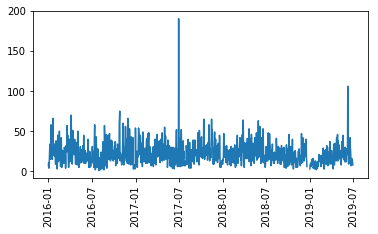

In [3]:
#plot original data
#plot updated data
date_time = df['date']
date_time = pd.to_datetime(date_time)
y = df['y']

DF = pd.DataFrame()
DF['y'] = y
DF = DF.set_index(date_time)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF)
plt.savefig("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/1.Original Plot.png")


In [4]:
#import updated data
df1 = pd.read_csv("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/roomdataprophet2.csv")
df1.head()

,date,y
0,1/1/2016,7
1,1/2/2016,11
2,1/3/2016,4
3,1/4/2016,7
4,1/5/2016,16


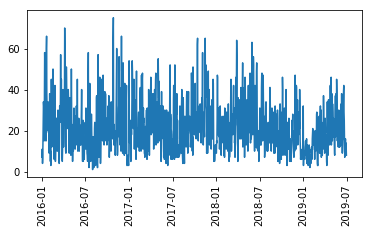

In [5]:
#plot updated data 
date_time = df1['date']
date_time = pd.to_datetime(date_time)
y = df1['y']

DF_1 = pd.DataFrame()
DF_1['y'] = y
DF_1 = DF_1.set_index(date_time)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF_1)
plt.savefig("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/2.Updated Plot.png")

In [6]:
#changed the above to DF1 for plot puprpose only
#for analysis using df1
df1.shape

(1277, 2)

In [7]:
df1.dtypes

date    object
y        int64
dtype: object

In [8]:
#change date column to ds because prophet requires date column to be names ds
df1['ds'] = df1['date']
df1.head()

,date,y,ds
0,1/1/2016,7,1/1/2016
1,1/2/2016,11,1/2/2016
2,1/3/2016,4,1/3/2016
3,1/4/2016,7,1/4/2016
4,1/5/2016,16,1/5/2016


In [9]:
#change date to format required by Prophet
df1['ds'] = pd.to_datetime(df1['date'])
df1.head()


,date,y,ds
0,1/1/2016,7,2016-01-01
1,1/2/2016,11,2016-01-02
2,1/3/2016,4,2016-01-03
3,1/4/2016,7,2016-01-04
4,1/5/2016,16,2016-01-05


In [10]:
#take needed columns only
df2=df1[['ds','y']]
df2.head()

,ds,y
0,2016-01-01,7
1,2016-01-02,11
2,2016-01-03,4
3,2016-01-04,7
4,2016-01-05,16


In [11]:
#check for missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
ds    1277 non-null datetime64[ns]
y     1277 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.0 KB


In [12]:
#log transform the 'y' variable to convert non-stationary data to stationary
#this also converts trends to more linear trends
df3=df2
df3['y-orig'] = df3['y'] # saving original value of y
#log transform y
df3['y'] = np.log(df3['y'])
df3.head()

,ds,y,y-orig
0,2016-01-01,1.945910,7
1,2016-01-02,2.397895,11
2,2016-01-03,1.386294,4
3,2016-01-04,1.945910,7
4,2016-01-05,2.772589,16


In [13]:
#instantiate the model
model = Prophet()
#fit the model
model.fit(df3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kapali_s\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
#look at future until the end of 2019
future_data = model.make_future_dataframe(periods=184)

In [15]:
#look at predicted data
forecast_data = model.predict(future_data)
forecast_data.head()

#only view important columns #yhat is the forecast
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2019-12-27,1.805956,1.090436,2.485352
1457,2019-12-28,1.876651,1.170281,2.565225
1458,2019-12-29,1.340907,0.634418,1.980587
1459,2019-12-30,2.053685,1.352151,2.700274
1460,2019-12-31,2.239953,1.521178,2.985898


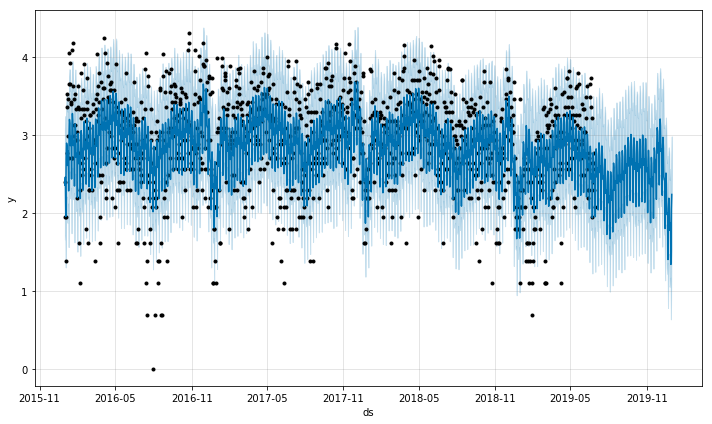

In [16]:
#plot forecast data
model.plot(forecast_data)
plt.tight_layout()
plt.savefig("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/3.Foreast Plot.png")
plt.show()


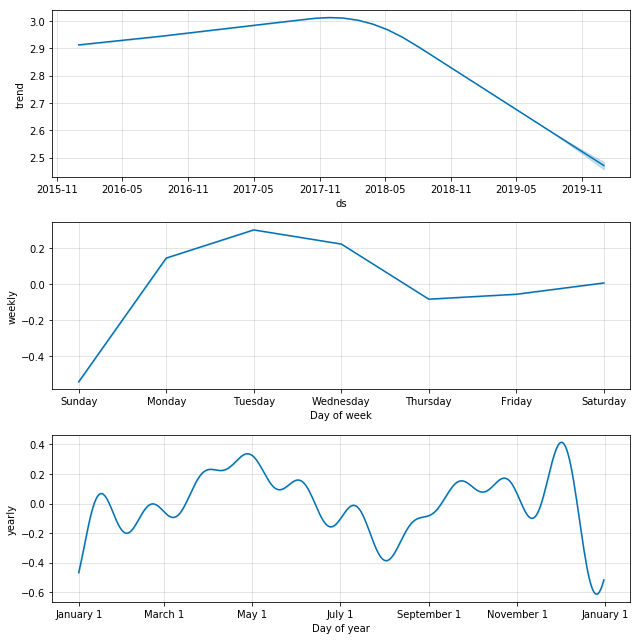

In [17]:
#view seasonality and trend components
model.plot_components(forecast_data)
plt.tight_layout()
plt.savefig("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/4.Components.png")
plt.show()

In [18]:
#trying to inverse the forecast
#forecast_data_inv_bx = copy.deepcopy(forecast_data)
#forecast_data_inv_bx['yhat_inv'] = inv_boxcox(forecast_data_inv_bx['yhat'],2)

#forecast_data_inv_bx.head()



In [19]:
#display forecast with original data instead of log transformed data
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])


In [20]:
forecast_data_orig.head(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2.912744,5.273508,21.629293,2.912744,2.912744,-0.553476,-0.553476,-0.553476,-0.055418,-0.055418,-0.055418,-0.498059,-0.498059,-0.498059,0.0,0.0,0.0,10.583194
1,2016-01-02,2.912881,5.569414,25.691591,2.912881,2.912881,-0.449846,-0.449846,-0.449846,0.007557,0.007557,0.007557,-0.457403,-0.457403,-0.457403,0.0,0.0,0.0,11.740386
2,2016-01-03,2.913018,3.674701,14.336626,2.913018,2.913018,-0.956618,-0.956618,-0.956618,-0.543684,-0.543684,-0.543684,-0.412935,-0.412935,-0.412935,0.0,0.0,0.0,7.073812
3,2016-01-04,2.913155,7.526392,29.082601,2.913155,2.913155,-0.219342,-0.219342,-0.219342,0.146368,0.146368,0.146368,-0.365709,-0.365709,-0.365709,0.0,0.0,0.0,14.787959
4,2016-01-05,2.913292,9.147006,34.250648,2.913292,2.913292,-0.013448,-0.013448,-0.013448,0.303365,0.303365,0.303365,-0.316813,-0.316813,-0.316813,0.0,0.0,0.0,18.171313
5,2016-01-06,2.913429,8.709817,33.716883,2.913429,2.913429,-0.042715,-0.042715,-0.042715,0.224623,0.224623,0.224623,-0.267338,-0.267338,-0.267338,0.0,0.0,0.0,17.649617
6,2016-01-07,2.913566,6.535056,27.230579,2.913566,2.913566,-0.301165,-0.301165,-0.301165,-0.082812,-0.082812,-0.082812,-0.218353,-0.218353,-0.218353,0.0,0.0,0.0,13.631749
7,2016-01-08,2.913703,7.214693,27.879195,2.913703,2.913703,-0.226301,-0.226301,-0.226301,-0.055418,-0.055418,-0.055418,-0.170883,-0.170883,-0.170883,0.0,0.0,0.0,14.693462
8,2016-01-09,2.913840,8.365014,32.710898,2.913840,2.913840,-0.118324,-0.118324,-0.118324,0.007557,0.007557,0.007557,-0.125881,-0.125881,-0.125881,0.0,0.0,0.0,16.371076
9,2016-01-10,2.913977,4.776640,19.722715,2.913977,2.913977,-0.627896,-0.627896,-0.627896,-0.543684,-0.543684,-0.543684,-0.084212,-0.084212,-0.084212,0.0,0.0,0.0,9.836320


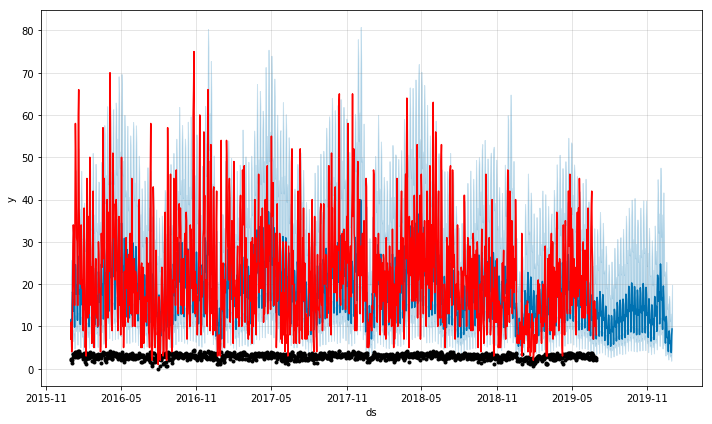

In [21]:
model.plot(forecast_data_orig)
plt.plot(DF_1['y'], color='red')
plt.tight_layout()
plt.savefig("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/5.Foreast_Data Plot.png")
plt.show() #Black line is the original log transformed data. 
            #Need to convert this back to original format


In [22]:
#get original data back
#df3['y_log'] = df3['y'] #copy the log-transformed data to another col
#df3['y'] = df3['y-orig'] #copy the original data to'y


In [23]:
forecast_data_orig.to_csv("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/TS Model/Python/prophetfcst.csv")

In [24]:
#Evaluate forecasts
from sklearn.metrics import mean_absolute_error  
df4 = model.predict(df3)
mean_absolute_error(np.exp(df3['y']), np.exp(df4['yhat']))

8.148010501008311